In [1]:
import os 
import glob

import numpy as np
import xarray as xr
import pandas as pd

from datetime import datetime, timedelta

In [2]:
path = '/uio/lagringshotell/geofag/projects/miphclac/hannasv/'
save_dir = '/uio/lagringshotell/geofag/projects/miphclac/hannasv/fractions_repo/'

years = np.arange(2004, 2018)
months = np.arange(1, 13)

In [3]:
def timestamp(filename):
    """
    Returns the numpy datetime 64 [ns] for the current date.
    This is a bit hardcoded at the moment ...
    """
    splits = filename.split('-')
    ts = splits[5]
    year = ts[:4]
    month = ts[4:6]
    day = ts[6:8]
    hr = ts[8:10]
    minuts = ts[10:12]
    sek = ts[12:14]
    # TODO make sure all filenames have seconds
    return np.datetime64( year+"-"+month+"-"+day+"T"+hr+":00:00"+".000000").astype(str)

In [4]:
def make_folder_str(month, year):
    """ Generates the folder search str
    month : int
    year : int
    
    Returns : str
        year_month
    """
    
    month = "%2.2d" % month
    return "{}_{}".format(year, month)

In [5]:
def get_missing_vals(folder):
    """Returns missing timesteps in folder."""
    year, month = folder.split('_')
    year  = int(year)
    month = int(month)
    
    if month < 12:
        next_m = month + 1
    else:
        next_m = 1
        
    t = np.arange(datetime(year,month,1), datetime(year,next_m,1), timedelta(hours=1)).astype(str)
    folder = make_folder_str(month, year)
    files_in_folder = glob.glob(os.path.join(path, folder, '*grb'))
    times = [timestamp(fil) for fil in files_in_folder]
    a = times 
    b = t
    c = [x for x in a if x not in b]+[x for x in b if x not in a]
    return c

In [6]:
folder = '2015_05'

In [7]:
get_missing_vals(folder)

[]

In [8]:
files_in_folder = glob.glob(os.path.join(path, folder, '*grb'))
times = [timestamp(fil) for fil in files_in_folder]

In [9]:
def timestamp_to_file_search_str(timestamp):
    splits = [split.split('T') for split in timestamp.split(':')[0].split('-')]
    s = ''
    for a in np.concatenate(splits):
        s+=a
    return s

In [10]:
def removes_duplicates(year, month):
    folder = make_folder_str(month, year)
    files_in_folder = glob.glob(os.path.join(path, folder, '*grb'))

    if np.unique(times) != len(times):
        keeping = []
        missing = []
        for fil in files_in_folder:
            # if timestep is already there don't append
            search_for = timestamp_to_file_search_str(timestamp(fil))
            files =  glob.glob(os.path.join(path, folder, '*-{}*grb'.format(search_for)))  
            if len(files) > 0:
                keeping.append(files[0]) # only keep the first one for multiple files of the same data

In [11]:
def find_correct_fraction_file_and_add_regridded():
    """
    
    
    """
    pass

In [12]:
# len(get_missing_vals(make_folder_str(year=y, month=m)

In [13]:
files = ['2004_04.nc', '2004_06.nc', '2004_08.nc', '2004_10.nc', '2004_12.nc', '2005_06.nc', 
'2005_08.nc', '2005_10.nc', '2005_12.nc',  '2006_02.nc',
'2004_05.nc', '2004_07.nc', '2004_09.nc', '2004_11.nc', '2005_05.nc', '2005_07.nc', 
'2005_09.nc', '2005_11.nc', '2006_01.nc']


In [14]:
for fil in files:
    data = xr.open_dataset(os.path.join(save_dir, fil))
    print(data)
    print(' ')

<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 161, time: 690)
Coordinates:
  * time       (time) datetime64[ns] 2004-04-02 ... 2004-04-30T23:00:00
  * latitude   (latitude) float64 30.0 30.25 30.5 30.75 ... 49.5 49.75 50.0
  * longitude  (longitude) float64 -15.0 -14.75 -14.5 -14.25 ... 24.5 24.75 25.0
Data variables:
    tcc        (time, latitude, longitude) float64 ...
    nr_nans    (time, latitude, longitude) float64 ...
 
<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 161, time: 716)
Coordinates:
  * time       (time) datetime64[ns] 2004-06-01 ... 2004-06-30T23:00:00
  * latitude   (latitude) float64 30.0 30.25 30.5 30.75 ... 49.5 49.75 50.0
  * longitude  (longitude) float64 -15.0 -14.75 -14.5 -14.25 ... 24.5 24.75 25.0
Data variables:
    tcc        (time, latitude, longitude) float64 ...
    nr_nans    (time, latitude, longitude) float64 ...
 
<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 161, time: 741)
Coordinates:
  * time       (time) dat

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

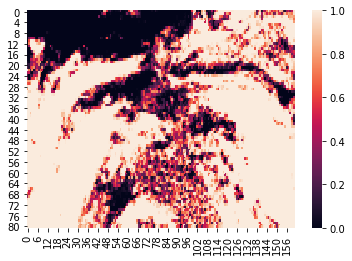

In [16]:
sns.heatmap(data.tcc.isel(time = 2).values)
plt.show()

# Testing : 

In [17]:
path = '/uio/lagringshotell/geofag/projects/miphclac/hannasv/'
save_dir = '/uio/lagringshotell/geofag/projects/miphclac/hannasv/fractions_repo/'

In [18]:
years = np.arange(2004, 2019)
months = np.arange(1, 13)

In [ ]:
file1 = open("missing_values2.txt","w") 
file1.write(d)
file1.write('\n')
file1.close()

In [19]:
#file1 = open("missing_values2.txt","w") 
all_dates = []
for y in np.arange(2004, 2019):
    for m in np.arange(1, 13):
        if not (y == 2004 and m < 3):
            folder = make_folder_str(m, y)
            dates = get_missing_vals(folder)
            all_dates += dates
            #if len(dates) > 0:
            #    for d in dates:
            #        file1.write(d)
            #        file1.write('\n')
#file1.close()

In [20]:
import matplotlib.pyplot as plt

In [21]:
len(all_dates)

18772

In [22]:
aa = np.array(all_dates, dtype='datetime64[ns]')

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


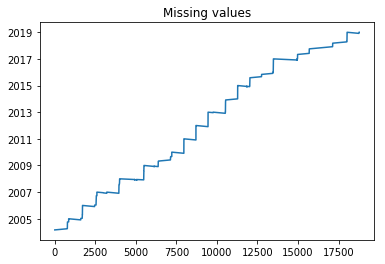

In [23]:
plt.plot(aa)
plt.title('Missing values')
plt.show()

# Sort into singles and periods

In [24]:
np.unique(all_dates)

array(['2004-03-01T00:00:00.000000', '2004-03-01T01:00:00.000000',
       '2004-03-01T02:00:00.000000', ..., '2018-12-31T21:00:00.000000',
       '2018-12-31T22:00:00.000000', '2018-12-31T23:00:00.000000'],
      dtype='|S26')

In [25]:
np.timedelta64?

Docstring: <no docstring>
File:      ~/anaconda3/lib/python2.7/site-packages/numpy/__init__.py
Type:      type


In [26]:
dt = np.timedelta64(1, 'h')

In [27]:
dt

numpy.timedelta64(1,'h')

In [28]:
abs(aa[0]-aa[1]) == np.timedelta64(1, 'h')

True

In [50]:
abs(aa[2] - aa[3]) == dt

True

In [51]:
abs(aa[3] - aa[2]) == dt

True

In [56]:
periods = []
single = []
aa = np.sort(np.array(all_dates, dtype='datetime64[ns]'))
dt =  np.timedelta64(1, 'h')

file1 = open("missing_values2.txt","w") 

# trenger start, stop for å lagre en periode
for i, val in enumerate(aa):
    # Looping over all values, 
    if i == 0:
        # first values
        print('first vales')
        if abs(val - aa[i+1]) != dt:
            print('first single')
            single.append(val)
            file1.write(str(val))
            file1.write('\n')
        else:
            print('first period')
            start = val
        
    elif i < len(aa)-1: 
        # All middle values.
        bool_next = abs(val - aa[i+1]) == dt
        bool_prev = abs(aa[i-1] - val) == dt
        
        # 1) Single
        if not bool_next and not bool_prev:
            single.append(val)
            file1.write(str(val))
            file1.write('\n')
            
        # 2) Start sequence
        elif not bool_prev and bool_next:
            start = val
            print('detected start')
            
        # 3) Middle sequence
        elif bool_prev and bool_next:
            # nothing really happens
            print('detected midle')
            #
        # 4) End sequence
        else: # bool_prev and not bool_next:
            print('adds period')
            period = '{}-{}'.format(start, val)
            periods.append(period)
            file1.write(period)
            file1.write('\n')
                            
    else:
        print('detects last')
        #bool_next = abs(val - aa[i+1]) == dt
        bool_prev = abs(val - aa[i-1]) == dt
        if not bool_prev:
            single.append(val)
            file1.write(str(val))
            file1.write('\n')
        else:
            period = '{}-{}'.format(start, val)
            periods.append(period)
            file1.write(period)
            file1.write('\n')
file1.close()            

first vales
first period
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle
detected midle


In [54]:
len(single), len(periods)

(69, 2607)

In [48]:
periods

['2004-03-01T00:00:00.000000000-2018-12-31T23:00:00.000000000']